# OASIS INFOBYTE DATA SCIENCE INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## BATCH December-P1

### PROBLEM STATEMENT -  IRIS FLOWER CLASSIFICATION (TASK 1)

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them. Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine
Learning. 

DOWNLOAD DATASET FROM HERE - https://www.kaggle.com%2Fdatasets%2Fsaurabh00007%2Firiscsv&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


#### IMPORTING LIBRARIES

In [2]:
!pip install keras_tuner

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import seaborn as sns
import keras_tuner
import keras
import tensorflow as tf
import gc

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Input

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### READING THE DATASET

In [4]:
data = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
cloned_data = data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### EXPLORATORY ANALYSIS OF THE RAW DATA

In [5]:
print(data.shape)

(150, 6)


In [6]:
print('\nThe number of null values in the dataset is : \n' + str(data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(data.info())
print('\nThe data distribution in the columns is given by :\n')
print(data.describe())
print('\nThe number of unique values in the SepalLengthCm column is : ' + str(len(data['SepalLengthCm'].unique())))
print('\nThe number of unique values in the SepalWidthCm column is : ' + str(len(data['SepalWidthCm'].unique())))
print('\nThe number of unique values in the PetalLengthCm column is : ' + str(len(data['PetalLengthCm'].unique())))
print('\nThe number of unique values in the PetalWidthCm column is : ' + str(len(data['PetalWidthCm'].unique())))


The number of null values in the dataset is : 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

The data distribution in the columns is given by :

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
me

In [7]:
print('\nThe data distribution for Iris-setosa is given by :\n')
print(data[data['Species'] == 'Iris-setosa'].describe())

print('\nThe data distribution for Iris-versicolor is given by :\n')
print(data[data['Species'] == 'Iris-versicolor'].describe())

print('\nThe data distribution for Iris-virginica is given by :\n')
print(data[data['Species'] == 'Iris-virginica'].describe())


The data distribution for Iris-setosa is given by :

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

The data distribution for Iris-versicolor is given by :

              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.3260

#### GRAPHICAL REPRESENTATION OF THE RAW DATA

<Axes: xlabel='Species', ylabel='count'>

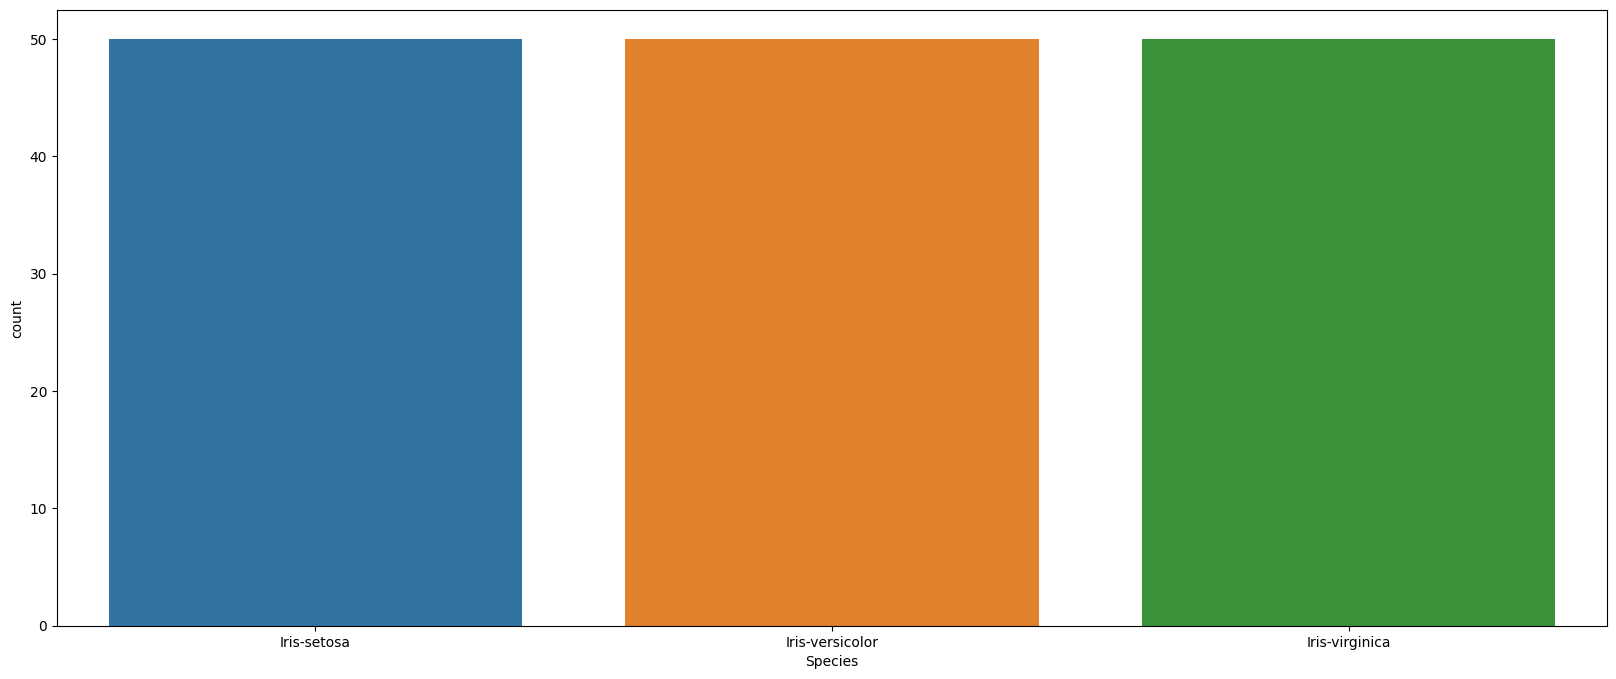

In [8]:
plt.figure(figsize = (20,8))
sns.countplot(data, x = 'Species')

Text(0.5, 1.0, 'Boxplot for Petal Width')

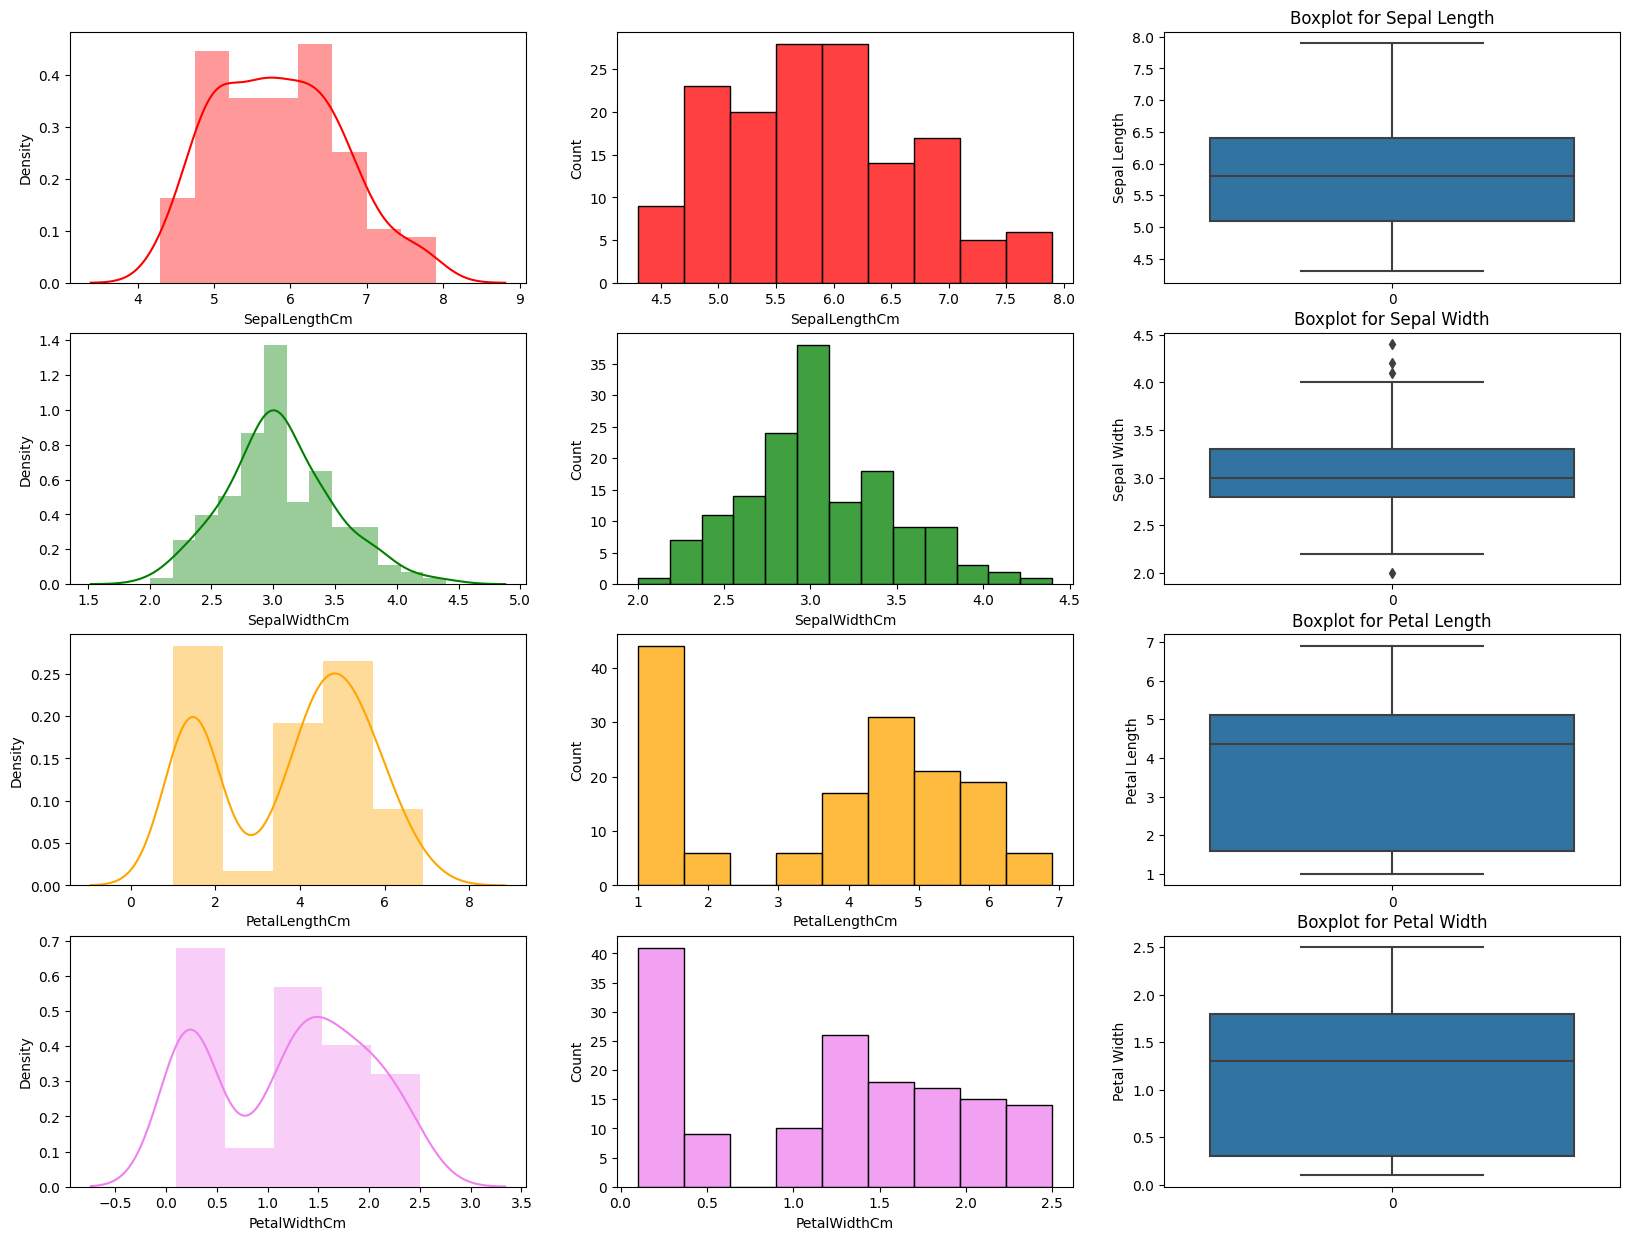

In [9]:
#Data Distribution

plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
plt.subplot(4,3,1)
sns.distplot(data['SepalLengthCm'],color = 'red')
plt.subplot(4,3,2)
sns.histplot(data['SepalLengthCm'],color = 'red')
plt.subplot(4,3,3)
sns.boxplot(data['SepalLengthCm'])
plt.ylabel('Sepal Length')
plt.title('Boxplot for Sepal Length')
plt.subplot(4,3,4)
sns.distplot(data['SepalWidthCm'],color = 'green')
plt.subplot(4,3,5)
sns.histplot(data['SepalWidthCm'],color = 'green')
plt.subplot(4,3,6)
sns.boxplot(data['SepalWidthCm'])
plt.ylabel('Sepal Width')
plt.title('Boxplot for Sepal Width')

plt.subplot(4,3,7)
sns.distplot(data['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,8)
sns.histplot(data['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,9)
sns.boxplot(data['PetalLengthCm'])
plt.ylabel('Petal Length')
plt.title('Boxplot for Petal Length')
plt.subplot(4,3,10)
sns.distplot(data['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,11)
sns.histplot(data['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,12)
sns.boxplot(data['PetalWidthCm'])
plt.ylabel('Petal Width')
plt.title('Boxplot for Petal Width')

<Axes: >

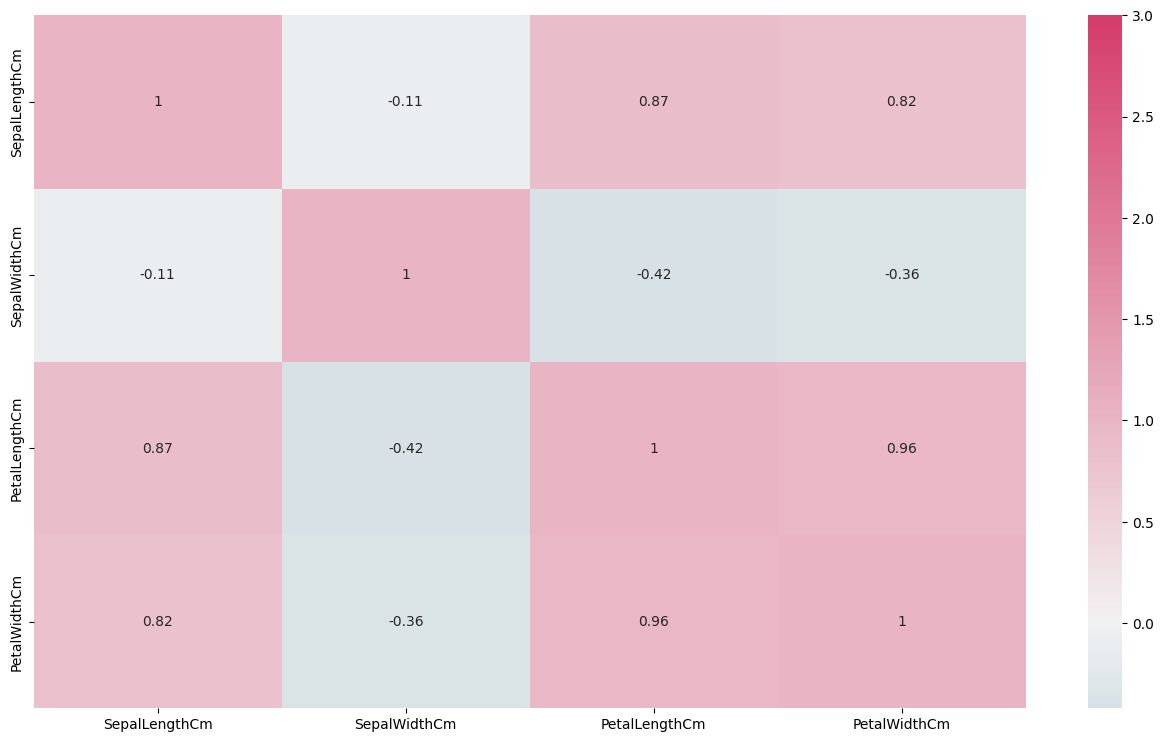

In [10]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (16,9))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(data.iloc[:,1:-1].corr(),cmap = cmap, center = 0, vmax = 3,annot = True) 

<Figure size 2000x1500 with 0 Axes>

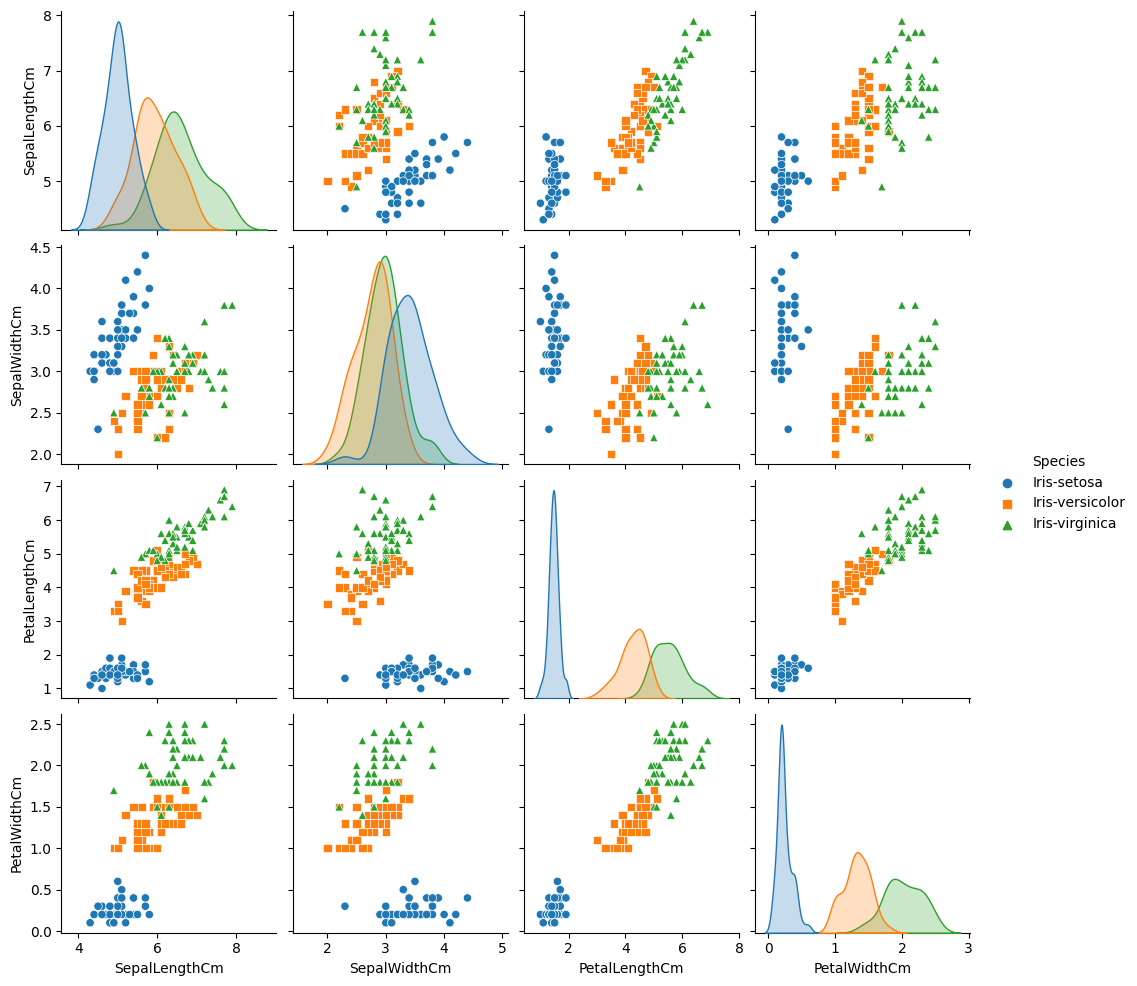

In [11]:
plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
sns.pairplot(data.iloc[:,1:], hue = 'Species', markers = ["o", "s", "^"])

#### FEATURE ENGINEERING

In [12]:
#Dropping Redundant Data
data = data.drop(['Id'], axis = 1)

#Scaling the SepalLengthCm Values
SepalLengthScaler = MinMaxScaler()
data['SepalLengthCm'] = SepalLengthScaler.fit_transform(np.array(data['SepalLengthCm']).reshape(-1,1))

#Scaling the SepalWidthCm Values
SepalWidthScaler = MinMaxScaler()
data['SepalWidthhCm'] = SepalWidthScaler.fit_transform(np.array(data['SepalWidthCm']).reshape(-1,1))

#Scaling the PetalLengthCm Values
PetalLengthScaler = MinMaxScaler()
data['PetalLengthCm'] = PetalLengthScaler.fit_transform(np.array(data['PetalLengthCm']).reshape(-1,1))

#Scaling the SepalWidthCm Values
PetalWidthScaler = MinMaxScaler()
data['PetalWidthhCm'] = PetalWidthScaler.fit_transform(np.array(data['PetalWidthCm']).reshape(-1,1))

#Encoding the Species Values
SpeciesEncoder = LabelEncoder()
data['Species'] = SpeciesEncoder.fit_transform(np.array(data['Species']).reshape(-1,1))

#### SPLITTING INTO THE X(FEATURES) AND Y(TARGETS)

In [13]:
features = data.iloc[:,0:4].values
features = np.array(features)

targets = data.iloc[:,4].values
targets = np.array(targets)

#### SPLITIING INTO THE TRAINING AND TEST SETS

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, shuffle = True, random_state = 69)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 4)
(23, 4)
(127,)
(23,)


#### GETTING THE BEST MODEL

In [16]:
def build_model(hp):
    
    model = keras.models.Sequential()
    
    model.add(tf.keras.Input(shape=(4)))

    model.add(tf.keras.layers.Flatten())

    model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dense(3,activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

    return model

In [17]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 200, directory='output', project_name="iris_species_detection")

tuner_search.search(x_train, y_train, epochs = 3 , validation_split=0.15)

Trial 200 Complete [00h 00m 04s]
val_accuracy: 0.8500000238418579

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 10m 51s


In [18]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 880, 'dense_1_activation': 'elu', 'dense_1_kernel_initializer': 'glorot_normal', 'dropout_1_rate': 0.6, 'dense_2_units': 728, 'dense_2_activation': 'elu', 'dense_2_kernel_initializer': 'glorot_normal', 'dropout_2_rate': 0.8, 'dense_3_units': 736, 'dense_3_activation': 'selu', 'dense_3_kernel_initializer': 'glorot_normal', 'dropout_3_rate': 0.30000000000000004, 'dense_4_units': 704, 'dense_4_activation': 'relu', 'dense_4_kernel_initializer': 'random_normal', 'learning_rate': 0.001}


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7991c37d1c30>>


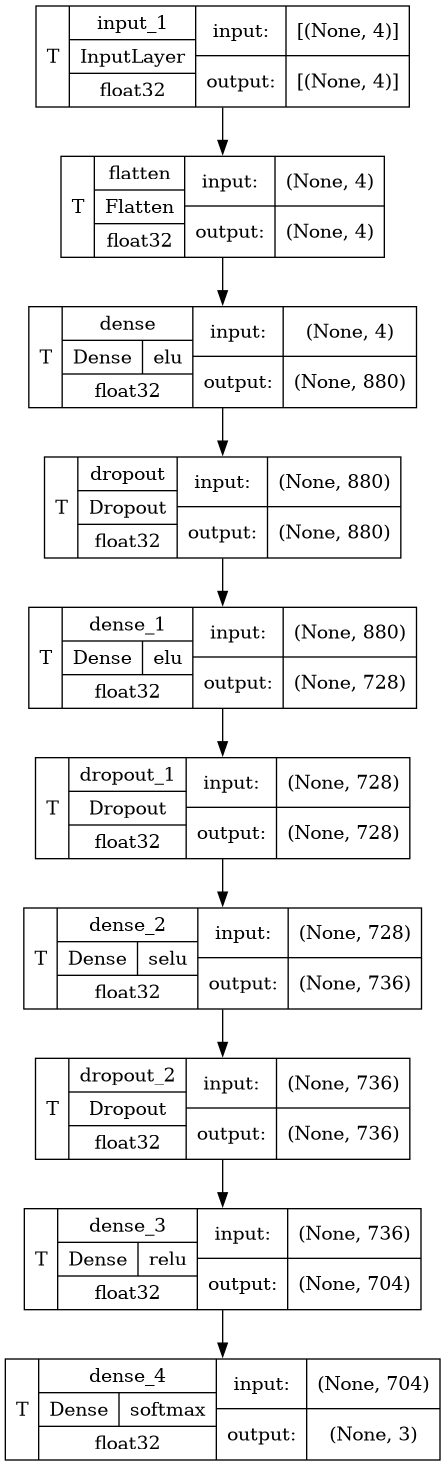

In [19]:
print(model.summary)
model_name='/kaggle/working/iris_species_classifier.png'
keras.utils.plot_model(model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### FINAL MODEL IMPLEMENTATION

In [20]:
iris_species_classifier = model
iris_species_classifier.fit(x_train, y_train, epochs = 100, validation_split = 0.15)

Epoch 1/100
4/4 [==============================] - 2s 73ms/step - loss: 0.7125 - accuracy: 0.6542 - val_loss: 0.5982 - val_accuracy: 0.6500
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6443 - accuracy: 0.7477 - val_loss: 0.3439 - val_accuracy: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6865 - accuracy: 0.7664 - val_loss: 0.2667 - val_accuracy: 0.9000
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5226 - accuracy: 0.8131 - val_loss: 0.1313 - val_accuracy: 0.9000
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3904 - accuracy: 0.8505 - val_loss: 0.1236 - val_accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6566 - accuracy: 0.7757 - val_loss: 0.1049 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4247 - accuracy: 0.8131 - val_loss: 0.1694 - val_accuracy: 0.9000
Epoch 8/100
4/4 [===

#### EVALUATION OF THE CLASSIFIER

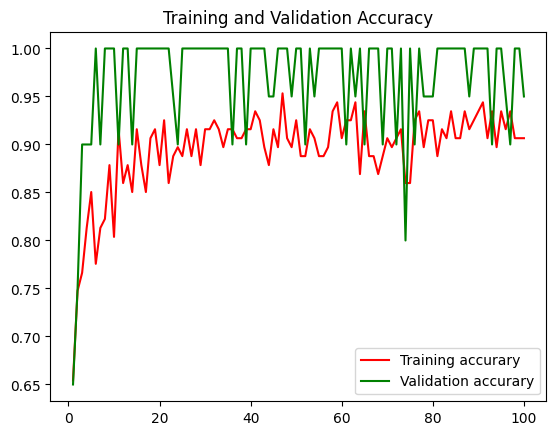

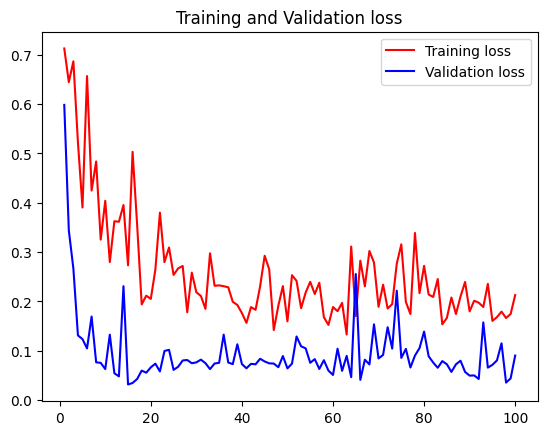

In [21]:
acc=iris_species_classifier.history.history['accuracy']
val_acc=iris_species_classifier.history.history['val_accuracy']
loss=iris_species_classifier.history.history['loss']
val_loss=iris_species_classifier.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [22]:
y_probability= iris_species_classifier.predict(x_test)
y_predict = np.argmax(y_probability,axis=1)

1/1 [==============================] - 0s 102ms/step


The classification test results are : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



The test accuracy percentage is :
100.0


The test precision percentage is :
100.0


The test recall percentage is :
100.0


The test f1 percentage is :
100.0


The test ROC AUC percentage is :
1.0
Confusion Matrix :


<Axes: >

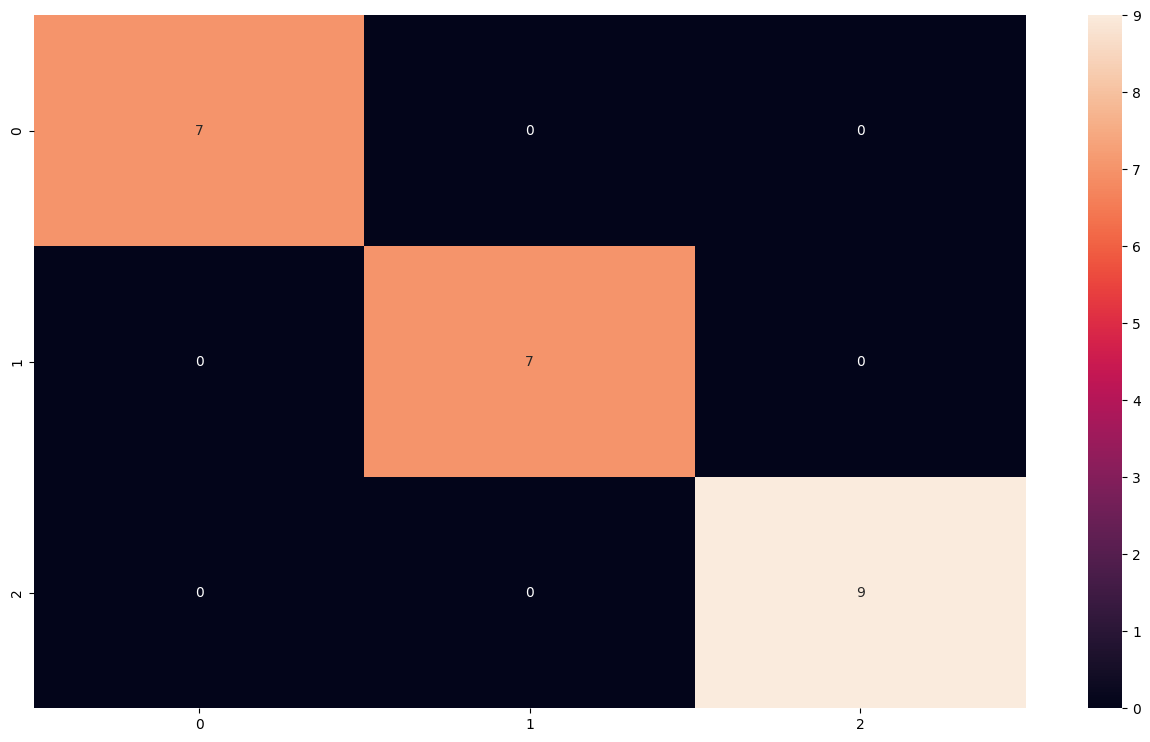

In [23]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print(roc_auc_score(y_test,y_probability,multi_class = 'ovr'))

print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize = (16,9))
sns.heatmap(cm, annot = True, fmt = 'g')

#### WHOLE CSV IMPLEMENTATION

In [24]:
predicted_species = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
test_predicted = []
test_probability= iris_species_classifier.predict(features)
test_locus = np.argmax(test_probability,axis=1)
for i in range (len(test_locus)):
    test_predicted.append(predicted_species[int(test_locus[i])])
test_predicted= np.array(test_predicted)
test_predictions = (test_predicted).tolist()
test_species = pd.Series((test_predictions))

5/5 [==============================] - 0s 2ms/step


In [25]:
test_dataset_final = pd.concat([cloned_data,test_species],axis = 1)
test_dataset_final.columns.values[6] = 'Predicted_Species'

In [26]:
test_dataset_final.to_csv('/kaggle/working/Processed_Test_Data.csv', index = False)